In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
import nltk
import string
from collections import defaultdict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nathan.fletcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nathan.fletcher\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Dataset Description and Introduction

The objective of this coursework is to apply two different NLP's to the chosen dataset. The selected dataset contains fake and real news articles. I will start off by preprocessing the dataset, splitting the data into true and fake dataframes and then combining them into one df to then split into training and test data. I will create a report of the findings of both NLP's modules chosen and evaluate the two models and how they perform. 

Dataset link:https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

# Setting seed 

In [2]:
np.random.seed(300)

# Data Import

In [3]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [4]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


# Preprocessing

In [6]:
df_true = df_true.drop_duplicates()
df_true
#removal of duplicates 

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
df_fake = df_fake.drop_duplicates()
df_fake
#removal of duplicates 

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
df_true.insert(4, "News", "True")
df_true
#inserting News column to identify whether True or False

,title,text,subject,date,News
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [9]:
df_fake.insert(4, "News", "Fake")
df_fake
#inserting News column to identify whether True or False

,title,text,subject,date,News
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
df_list = pd.concat([df_fake, df_true], ignore_index = True)
df_list
#combining the two dataframes into one

,title,text,subject,date,News
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [11]:
df_list = df_list.dropna()
df_list
#Dropping any NA Values, however there are no rows affected 

,title,text,subject,date,News
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


<AxesSubplot:>

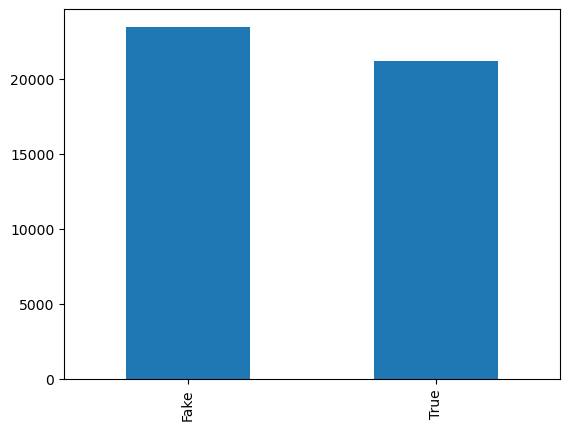

In [12]:
df_list['News'].value_counts().plot(kind='bar')
#visualising balance of true and false in dataset 

# Lower Case

In [13]:
df_list['text']=df_list['text'].apply(lambda x: x.lower())
df_list['title']=df_list['title'].apply(lambda x: x.lower())
df_list
#Converting text in both columns 'title' and 'text' to lowercase 

,title,text,subject,date,News
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",Fake
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",Fake
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44684,'fully committed' nato backs new u.s. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,"August 22, 2017",True
44685,lexisnexis withdrew two products from chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,"August 22, 2017",True
44686,minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,"August 22, 2017",True
44687,vatican upbeat on possibility of pope francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,"August 22, 2017",True


# Punctuation removal

In [14]:
df_list['text'] = df_list['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_list['text'] = df_list['text'].apply(lambda x: re.sub(r'[^\w\s]', '',x))
df_list
#removal of punctuation in 'text' column

,title,text,subject,date,News
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",Fake
3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,News,"December 29, 2017",Fake
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44684,'fully committed' nato backs new u.s. approach...,brussels reuters nato allies on tuesday welco...,worldnews,"August 22, 2017",True
44685,lexisnexis withdrew two products from chinese ...,london reuters lexisnexis a provider of legal...,worldnews,"August 22, 2017",True
44686,minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused soviet...,worldnews,"August 22, 2017",True
44687,vatican upbeat on possibility of pope francis ...,moscow reuters vatican secretary of state car...,worldnews,"August 22, 2017",True


In [15]:
df_list['title'] = df_list['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_list['title'] = df_list['title'].apply(lambda x: re.sub(r'[^\w\s]', '',x))
df_list
#removal of punctuation in 'title' column

,title,text,subject,date,News
0,donald trump sends out embarrassing new years...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",Fake
3,trump is so obsessed he even has obamas name ...,on christmas day donald trump announced that h...,News,"December 29, 2017",Fake
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44684,fully committed nato backs new us approach on ...,brussels reuters nato allies on tuesday welco...,worldnews,"August 22, 2017",True
44685,lexisnexis withdrew two products from chinese ...,london reuters lexisnexis a provider of legal...,worldnews,"August 22, 2017",True
44686,minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused soviet...,worldnews,"August 22, 2017",True
44687,vatican upbeat on possibility of pope francis ...,moscow reuters vatican secretary of state car...,worldnews,"August 22, 2017",True


# Stopword removal

In [16]:
nltk.download('stopwords')  

stop_words = set(stopwords.words('english'))

df_list['title'] = df_list['title'].apply(lambda x:" ".join([word for word in x.split() if word.lower() not in stop_words]))
#Removal of stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nathan.fletcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
nltk.download('stopwords')  

stop_words = set(stopwords.words('english'))

df_list['text'] = df_list['text'].apply(lambda x:" ".join([word for word in x.split() if word.lower() not in stop_words]))
#Removal of stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nathan.fletcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Test and Training split

In [18]:
df_x = df_list.iloc[:, :-1]
df_x
#creating dataframe without News column 

,title,text,subject,date
0,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,News,"December 31, 2017"
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017"
3,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,News,"December 29, 2017"
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,News,"December 25, 2017"
...,...,...,...,...
44684,fully committed nato backs new us approach afg...,brussels reuters nato allies tuesday welcomed ...,worldnews,"August 22, 2017"
44685,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,worldnews,"August 22, 2017"
44686,minsk cultural hub becomes authorities,minsk reuters shadow disused sovietera factori...,worldnews,"August 22, 2017"
44687,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,worldnews,"August 22, 2017"


In [19]:
df_y = df_list.iloc[:, -1:]
df_y
#creating dataframe with only News column 

,News
0,Fake
1,Fake
2,Fake
3,Fake
4,Fake
...,...
44684,True
44685,True
44686,True
44687,True


In [20]:
df_train, df_test, y_train, y_test = train_test_split(df_x, df_y, random_state=1, train_size = .80)
#creating train and test split, training on 80% of data and testing with remaining 20% 

In [21]:
df_train

,title,text,subject,date
36473,lebanons hariri meet major powers paris,paris reuters lebanese prime minister saad alh...,worldnews,"December 4, 2017"
16685,obama theres little difference communism capit...,riiiight choose works,Government News,"Mar 25, 2016"
24559,bernie sanders brings local politics focus mas...,somerville mass reuters us senator bernie sand...,politicsNews,"October 23, 2017"
5571,hillarys glorious frozen pun totally melted tr...,donald trump busy trying defend antisemitic st...,News,"July 6, 2016"
40100,polls open slovenian president runs second man...,ljubljana reuters polls opened slovenian presi...,worldnews,"October 22, 2017"
...,...,...,...,...
43723,somali army repels al shabaab attack least 17 ...,mogadishu reuters somali government forces reg...,worldnews,"September 11, 2017"
32511,new york lawmakers vote legalize fantasy sport...,albany ny reuters fantasy sports moved step cl...,politicsNews,"June 18, 2016"
5192,doh trump tells crowd richest county america e...,virginia gop presidential nominee donald trump...,News,"August 3, 2016"
12172,armynavy crowd erupts trump interviewmake amer...,watch,politics,"Dec 10, 2016"


In [22]:
df_test

,title,text,subject,date
196,trump screams twitter seeing poll fox news,rex tillerson right donald trump fcking morona...,News,"October 22, 2017"
24116,house backs 700 billion defense policy bill fu...,washington reuters us house representatives pa...,politicsNews,"November 14, 2017"
22099,absolute submission trump bows neocon orthodoxy,consortium news exclusive mideast trip saudi a...,US_News,"June 1, 2017"
41083,hong kong leader says asian financial hub face...,hong kong reuters hong kong chief executive ca...,worldnews,"October 11, 2017"
23908,mattis tillerson departure theres nothing,washington reuters us defense secretary jim ma...,politicsNews,"November 30, 2017"
...,...,...,...,...
16412,watch liberal cnn lawyer skewer village idiot ...,,Government News,"Sep 7, 2016"
37835,brexit progress needed early december unlock t...,gothenburg sweden reuters european council pre...,worldnews,"November 17, 2017"
4461,rightwingers actually honor cops killed freddi...,media research center rightwing media analysis...,News,"September 27, 2016"
40912,russia accuses us denying entry senior militar...,united nations reuters russia accused united s...,worldnews,"October 12, 2017"


In [23]:
y_train

,News
36473,True
16685,Fake
24559,True
5571,Fake
40100,True
...,...
43723,True
32511,True
5192,Fake
12172,Fake


In [24]:
y_test

,News
196,Fake
24116,True
22099,Fake
41083,True
23908,True
...,...
16412,Fake
37835,True
4461,Fake
40912,True


# Representation

In [25]:
tfidf_vectorizer = TfidfVectorizer()
#TF-IDF used for represntation

In [26]:
combined_corpus1 = df_train['title'] + ' ' + df_train['text']
X_train_tfidf = tfidf_vectorizer.fit_transform(combined_corpus1)

In [27]:
combined_corpus2 = df_test['title'] + ' ' + df_test['text']
X_test_tfidf = tfidf_vectorizer.transform(combined_corpus2)

In [28]:
combined_corpus3 = y_train['News'] 
Y_train_tfidf = tfidf_vectorizer.fit_transform(combined_corpus3)

In [29]:
combined_corpus4 = y_test['News']
Y_test_tfidf = tfidf_vectorizer.transform(combined_corpus4)

# Data prep

In [30]:
X_train = df_train['title'] + ' ' + df_train['text']

In [31]:
X_test = df_test['title'] + ' ' + df_test['text']

# SVM Classification

In [32]:
text_clf1 = Pipeline([
 ('count', TfidfVectorizer()),
 ('rep', TfidfTransformer()),
 ('mod', SVC()),
 ])


In [33]:
text_clf1.fit(X_train, y_train)

C:\Users\nathan.fletcher\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('count', TfidfVectorizer()), ('rep', TfidfTransformer()),
                ('mod', SVC())])

In [34]:
y_pred = text_clf1.predict(X_test)

# Performance Metric

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [36]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4735
        True       0.99      0.99      0.99      4203

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



# SVM Grid Search

In [37]:
param_grid1 = {
    'mod__C': [0.1, 1, 10],
    'mod__kernel': ['linear', 'rbf'],
    'rep__use_idf': [True, False],
}

In [38]:
grid_search1 = GridSearchCV(text_clf1, param_grid1, cv=5, scoring='accuracy', n_jobs=-1)

In [39]:
grid_search1.fit(X_train, y_train)

C:\Users\nathan.fletcher\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count', TfidfVectorizer()),
                                       ('rep', TfidfTransformer()),
                                       ('mod', SVC())]),
             n_jobs=-1,
             param_grid={'mod__C': [0.1, 1, 10],
                         'mod__kernel': ['linear', 'rbf'],
                         'rep__use_idf': [True, False]},
             scoring='accuracy')

In [40]:
print("Best Hyperparameters:", grid_search1.best_params_)

Best Hyperparameters: {'mod__C': 10, 'mod__kernel': 'linear', 'rep__use_idf': False}


In [41]:
y_pred_grid = grid_search1.predict(X_test)

In [42]:
report_grid = classification_report(y_test, y_pred_grid)
print("Classification Report (Grid Search Model):\n", report_grid)

Classification Report (Grid Search Model):
               precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4735
        True       0.99      1.00      1.00      4203

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



In [43]:
accuracy = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


# NB Classification

In [44]:
text_clf2 = Pipeline([
    ('count', TfidfVectorizer()),
    ('rep', TfidfTransformer()),
    ('mod', MultinomialNB()),  # Naive Bayes classifier
])

In [45]:
text_clf2.fit(X_train, y_train)

C:\Users\nathan.fletcher\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('count', TfidfVectorizer()), ('rep', TfidfTransformer()),
                ('mod', MultinomialNB())])

In [46]:
y_pred = text_clf2.predict(X_test)

# Performance Metric

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [48]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Fake       0.96      0.93      0.95      4735
        True       0.92      0.96      0.94      4203

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



# NB Grid Search

In [49]:
param_grid2 = {
    'mod__alpha': [0.1, 0.5, 1.0],  
}

In [50]:
grid_search2 = GridSearchCV(text_clf2, param_grid2, cv=5, scoring='accuracy', n_jobs=-1)

In [51]:
grid_search2.fit(X_train, y_train)

C:\Users\nathan.fletcher\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count', TfidfVectorizer()),
                                       ('rep', TfidfTransformer()),
                                       ('mod', MultinomialNB())]),
             n_jobs=-1, param_grid={'mod__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy')

In [52]:
best_model = grid_search2.best_estimator_
print("Best Hyperparameters:", grid_search2.best_params_)

Best Hyperparameters: {'mod__alpha': 0.1}


In [53]:
y_pred_grid = best_model.predict(X_test)

In [54]:
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Accuracy (Grid Search):", accuracy_grid)

Accuracy (Grid Search): 0.9586037144775117


# Decision Trees

In [55]:
text_clf3 = Pipeline([
    ('count', TfidfVectorizer()),
    ('rep', TfidfTransformer()),
    ('mod', DecisionTreeClassifier()),  # Decision Tree classifier
])

In [56]:
text_clf3.fit(X_train, y_train)

Pipeline(steps=[('count', TfidfVectorizer()), ('rep', TfidfTransformer()),
                ('mod', DecisionTreeClassifier())])

In [57]:
y_pred = text_clf3.predict(X_test)

# Performance Metric

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [59]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4735
        True       1.00      1.00      1.00      4203

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



# Random Trees Grid Search

In [60]:
param_grid3 = {
    'mod__max_depth': [None, 10, 20],  
    'mod__min_samples_split': [2, 5, 10],  
}

In [61]:
grid_search3 = GridSearchCV(text_clf3, param_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [62]:
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('count', TfidfVectorizer()),
                                       ('rep', TfidfTransformer()),
                                       ('mod', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'mod__max_depth': [None, 10, 20],
                         'mod__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [63]:
best_model = grid_search3.best_estimator_
print("Best Hyperparameters:", grid_search3.best_params_)

Best Hyperparameters: {'mod__max_depth': None, 'mod__min_samples_split': 5}


In [64]:
y_pred_grid = best_model.predict(X_test)

In [65]:
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Accuracy (Grid Search):", accuracy_grid)

Accuracy (Grid Search): 0.9964197807115686


# Real News Test

In [66]:
df_real_news = pd.read_csv('Real test.csv')
df_real_news
#first two rows are real news copied from NCB, third row is made up news by Nathans News

,title,text,subject,date
0,Ex-Obama admin official arrested after he was ...,A former national security adviser in the Obam...,NBC American News,23/11/2023
1,Thanksgiving travelers told to 'be nice' as al...,Busy roads and crowded skies are as much a par...,NBC American News,23/11/2023
2,Jackie Chan is set to buy America,Jackie chan the successful movie star has reac...,Nathans news,23/11/2023


# Drop Duplicates

In [67]:
df_real_news = df_real_news.drop_duplicates()
df_real_news
#removal of duplicates 

,title,text,subject,date
0,Ex-Obama admin official arrested after he was ...,A former national security adviser in the Obam...,NBC American News,23/11/2023
1,Thanksgiving travelers told to 'be nice' as al...,Busy roads and crowded skies are as much a par...,NBC American News,23/11/2023
2,Jackie Chan is set to buy America,Jackie chan the successful movie star has reac...,Nathans news,23/11/2023


# Drop N/A's

In [68]:
df_real_news = df_real_news.dropna()
df_real_news
#Dropping any NA Values, however there are no rows affected 

,title,text,subject,date
0,Ex-Obama admin official arrested after he was ...,A former national security adviser in the Obam...,NBC American News,23/11/2023
1,Thanksgiving travelers told to 'be nice' as al...,Busy roads and crowded skies are as much a par...,NBC American News,23/11/2023
2,Jackie Chan is set to buy America,Jackie chan the successful movie star has reac...,Nathans news,23/11/2023


# Lower Case

In [69]:
df_real_news['text']=df_real_news['text'].apply(lambda x: x.lower())
df_real_news['title']=df_real_news['title'].apply(lambda x: x.lower())
df_real_news

,title,text,subject,date
0,ex-obama admin official arrested after he was ...,a former national security adviser in the obam...,NBC American News,23/11/2023
1,thanksgiving travelers told to 'be nice' as al...,busy roads and crowded skies are as much a par...,NBC American News,23/11/2023
2,jackie chan is set to buy america,jackie chan the successful movie star has reac...,Nathans news,23/11/2023


# Punctuation Removal

In [70]:
df_real_news['text'] = df_real_news['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_real_news['text'] = df_real_news['text'].apply(lambda x: re.sub(r'[^\w\s]', '',x))
df_real_news

,title,text,subject,date
0,ex-obama admin official arrested after he was ...,a former national security adviser in the obam...,NBC American News,23/11/2023
1,thanksgiving travelers told to 'be nice' as al...,busy roads and crowded skies are as much a par...,NBC American News,23/11/2023
2,jackie chan is set to buy america,jackie chan the successful movie star has reac...,Nathans news,23/11/2023


# Stopword Removal

In [71]:
nltk.download('stopwords')  

stop_words = set(stopwords.words('english'))

df_real_news['title'] = df_real_news['title'].apply(lambda x:" ".join([word for word in x.split() if word.lower() not in stop_words]))
#Removal of stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nathan.fletcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Representation

In [72]:
vectorizer = CountVectorizer()
#Bag-of-Words used 

In [73]:
combined_corpus2 = df_real_news['title'] + ' ' + df_real_news['text']
X_real_news_BoW = vectorizer.fit_transform(combined_corpus2)

In [74]:
X_real_news_BoW = df_real_news['title'] + ' ' + df_real_news['text']

# SVM Model

In [75]:
print(X_real_news_BoW)

0    ex-obama admin official arrested recorded taun...
1    thanksgiving travelers told 'be nice' all-time...
2    jackie chan set buy america jackie chan the su...
dtype: object


In [76]:
y_pred = text_clf1.predict(X_real_news_BoW)

In [77]:
print(y_pred)

['True' 'True' 'Fake']
